We solve the parabolic equation:
<ul>
    <li>$ \frac{\partial h}{\partial t} - k\frac{\partial^2 h}{\partial x^2} = \nu$,  $\forall x \in (0,1)$,  $t>0$
    <li>$h|_{t=0}=0$
    <li>$h|_{x=0}=0$
    <li>$h|_{x=1}=0$
</ul>

In [291]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sym

In [292]:
x_0 = 0
x_n = 1
T = 1

In [366]:
n = 80 #timesteps
m = 40 #spacesteps
nodes_space = np.linspace(x_0,x_n,m)
nodes_time = np.linspace(0,T,n)
h = nodes_space[1]-nodes_space[0]
k = nodes_time[1]-nodes_time[0]


In [367]:
K = 2
x = sym.symbols('x')
t = sym.symbols('t')
u_fabric = x*(1-x)*t
source = x*(1-x) + 2*K*t
source_nodes = np.zeros((m,n))
u_fabric_nodes = np.zeros((m,n))
for j in range(n):
    for i in range(m):
        u_fabric_nodes[i,j] = u_fabric.subs([(x,nodes_space[i]),(t,nodes_time[j])])
        source_nodes[i,j] = source.subs([(x,nodes_space[i]),(t,nodes_time[j])])

In [368]:
A = -(2*np.eye(m)-np.diag(np.ones(m-1),k=1)-np.diag(np.ones(m-1),k=-1))
A[0,:] = np.zeros((1,m))
A[m-1,:] = np.zeros((1,m))
A[0,0]=1
A[m-1,m-1]=1

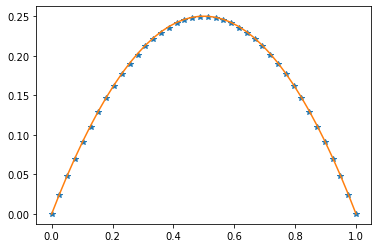

In [369]:
u = u_fabric_nodes[:,0]
for i in range(n):
    lhs = np.eye(m)*1/k-K/h**2*A
    rhs = source_nodes[:,i]+np.ones(m)*u/k
    u = np.linalg.solve(lhs,rhs)
    u[0] = u_0
    u[m-1] = u_n

plt.plot(nodes_space,u,'*')
plt.plot(nodes_space,u_fabric_nodes[:,n-1])
plt.show()

In [370]:
error = np.abs(u_fabric_nodes[:,n-1]-u)
L2error = h*np.dot(error,error)
print(L2error)



1.6277501696214095e-06


<h3>Convergence Results </h3>

<h6>Decreasing space step</h6>

| Stepsize in space, h | stepsize in time k   |     L2error |
|----------------------|----------------------|-------------|
|                 1/4  |                1/1000|  1.1531e-05 |
|                 1/8  |                1/1000|  1.1531e-05 |
|                 1/16 |                1/1000|  5.7786e-05 |

<h6>Decreasing time step</h6>

| Stepsize in space, h | stepsize in time k   |     L2error |
|----------------------|----------------------|-------------|
|                1/1000|                1/4   |  2.0840e-11 |
|                1/1000|                1/8   |  2.7065e-12 |
|                1/1000|                1/1000|  3.6404e-12 |
